In [2]:
import pandas as pd
import numpy as np

# New Section

In [4]:
dataset = pd.read_csv('Bhaav-Dataset.csv')

In [5]:
import pandas as pd
import numpy as np

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

In [7]:
dataset

,Sentences,Annotation
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1
4,गाँव में कितनी हलचल है,1
...,...,...
20299,फिर यहाँ सर्दी हो जाती है,4
20300,दिन-भर मैं यह देखती रहती हूँ कि धूप का टुकड़ा क...,4
20301,"पार्क का कोई ऐसा कोना नहीं, जहाँ मैं घड़ी-आधा घ...",4
20302,लेकिन यह बेंच मुझे सबसे अच्छी लगती है,1


In [8]:
dataset['Annotation'].value_counts()

4    11697
2     3168
1     2463
3     1512
0     1464
Name: Annotation, dtype: int64

In [9]:
dataset['Emotion'] = np.where(
    dataset['Annotation'] == 0, 'Anger', np.where(
        dataset['Annotation'] == 1, 'Joy', np.where(
            dataset['Annotation'] == 2, 'Sad', np.where(
                dataset['Annotation'] == 3, 'Suspense', 'Neutral'))))
dataset

,Sentences,Annotation,Emotion
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1,Joy
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1,Joy
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1,Joy
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1,Joy
4,गाँव में कितनी हलचल है,1,Joy
...,...,...,...
20299,फिर यहाँ सर्दी हो जाती है,4,Neutral
20300,दिन-भर मैं यह देखती रहती हूँ कि धूप का टुकड़ा क...,4,Neutral
20301,"पार्क का कोई ऐसा कोना नहीं, जहाँ मैं घड़ी-आधा घ...",4,Neutral
20302,लेकिन यह बेंच मुझे सबसे अच्छी लगती है,1,Joy


In [8]:
'''
full_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(dataset['Sentences'].values, tf.string),
            tf.cast(dataset['Annotation'].values, tf.int32)
        )
    )
)
'''

"\nfull_dataset = (\n    tf.data.Dataset.from_tensor_slices(\n        (\n            tf.cast(dataset['Sentences'].values, tf.string),\n            tf.cast(dataset['Annotation'].values, tf.int32)\n        )\n    )\n)\n"

In [10]:
train_size = int(dataset.shape[0]*0.8)

In [11]:
dataset = dataset[['Sentences','Annotation']]

print(dataset.shape)
dataset

(20304, 2)


,Sentences,Annotation
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1
4,गाँव में कितनी हलचल है,1
...,...,...
20299,फिर यहाँ सर्दी हो जाती है,4
20300,दिन-भर मैं यह देखती रहती हूँ कि धूप का टुकड़ा क...,4
20301,"पार्क का कोई ऐसा कोना नहीं, जहाँ मैं घड़ी-आधा घ...",4
20302,लेकिन यह बेंच मुझे सबसे अच्छी लगती है,1


In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataset, test_size=0.20)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (16243, 2)
test shape:  (4061, 2)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['Sentences'], dataset['Annotation'], test_size=0.2)

In [14]:
print(set(y_train.values))

{0, 1, 2, 3, 4}


In [15]:
train_df

,Sentences,Annotation
5838,मोती ने उत्तर दिया – “तुम्हारी तो इसने जान ही ...,2
11574,अंत में सब ओर से निराश होकर जहाज के कप्तान के ...,2
19060,सोमदत्त ने जोर से हाथ मार कर कहा —हाय ज्ञानू,2
5942,एक बार सांड़ झल्लाकर हीरा का अन्त कर देने के ल...,4
2657,या शायद वह देख रहा था कि मंजुला का मन इस संस्थ...,4
...,...,...
7735,आपको स्तम्भ के नीचे रखे हुए तैलपात्र में मछली ...,4
376,पकड़ेंगे क्या बेचारे,1
19642,पूरी बोतल बीच में है,4
8380,अपने घर जाने से पहले उसके कदम अचानक ही छोटू के...,4


In [16]:
test_df

,Sentences,Annotation
13908,असल में तुम्हारी नहीं बल्कि तुम्हारे दोस्त की ...,3
9528,ज्यादातर इससे स्टोर का काम लिया जाता था,4
5464,जब अनुकूल बाबू ने देखा कि उनकी पत्नी फलन को कल...,4
7994,तीसरे दल ने लिखा- हम मेहता महोदय के इस सिद्धां...,4
10405,"मुबारक ने कहा, ठीक है, मैं बाइस वर्ष पूर्व बसर...",4
...,...,...
15342,मैं जोर-जोर से चिंहुकने लगा,2
13638,पापा की कंपनी का गेस्ट हाउस शिमला के मॉल रोड प...,4
11515,सवेरे जब उजाला हुआ तो उसने देखा कि कुएँ की दीव...,4
7834,राजकुमारों का कुत्ता भटक कर एकलव्य के आश्रम मे...,4


In [17]:
pip install transformers

     |████████████████████████████████| 4.0 MB 7.4 MB/s 
     |████████████████████████████████| 6.6 MB 43.6 MB/s 
     |████████████████████████████████| 77 kB 9.0 MB/s 
     |████████████████████████████████| 895 kB 55.1 MB/s 
     |████████████████████████████████| 596 kB 53.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [18]:
! pip install --upgrade pandas tensorflow_gpu ktrain

     |████████████████████████████████| 497.5 MB 23 kB/s 
     |████████████████████████████████| 25.3 MB 62.2 MB/s 
     |████████████████████████████████| 462 kB 25.0 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 981 kB 75.8 MB/s 
     |████████████████████████████████| 263 kB 55.1 MB/s 
     |████████████████████████████████| 2.8 MB 40.1 MB/s 
     |████████████████████████████████| 1.2 MB 52.8 MB/s 
     |████████████████████████████████| 468 kB 50.9 MB/s 
     |████████████████████████████████| 3.3 MB 20.6 MB/s 
  Created wheel for ktrain: filename=ktrain-0.30.0-py3-none-any.whl size=25309161 sha256=5779de2616349ad69730cac47732d28c623320f1ad6afeb5b2607ac14b929867
  Stored in directory: /root/.cache/pip/wheels/25/00/ae/80d1b19dd02bc2e6bc9bac32ba7dbaa59aad789e93274e4868
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=6a7f15d9dcacd3dcc47a5a58de8e9b13b354a8348f58d2f592df9ab5fb482220

In [19]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [19]:
import ktrain
from ktrain import text
t = text.Transformer("monsoon-nlp/hindi-bert", maxlen=128, class_names=list(set(y_train.values)))

In [20]:
trn = t.preprocess_train(X_train.to_numpy(), y_train.to_numpy())

preprocessing train...
language: hi
train sequence lengths:
	mean : 13
	95percentile : 27
	99percentile : 38


Is Multi-Label? False


In [21]:
evalr = t.preprocess_test(X_test.to_numpy(), y_test.to_numpy())

preprocessing test...
language: hi
test sequence lengths:
	mean : 13
	95percentile : 27
	99percentile : 38


In [22]:
model = t.get_classifier()

In [23]:
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=16)

simulating training for different learning rates... this may take a few moments...
1015/1015 [==============================] - 3735s 4s/step - loss: 1.4276 - accuracy: 0.4834


done.
Visually inspect loss plot and select learning rate associated with falling loss


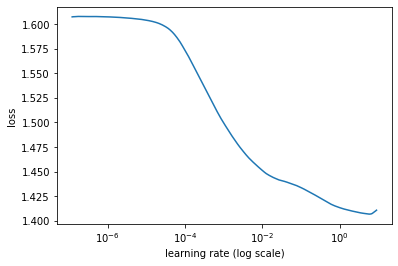

In [24]:
learner.lr_find(show_plot=True, max_epochs=1)

In [26]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=16)
learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
1016/1016 [==============================] - 3871s 4s/step - loss: 1.3107 - accuracy: 0.5714 - val_loss: 1.2294 - val_accuracy: 0.5900
Epoch 2/3
1016/1016 [==============================] - 3832s 4s/step - loss: 1.2524 - accuracy: 0.5726 - val_loss: 1.2188 - val_accuracy: 0.5900
Epoch 3/3
 217/1016 [=====>........................] - ETA: 47:34 - loss: 1.2715 - accuracy: 0.5593

KeyboardInterrupt: ignored

In [47]:
class_names=list(set(y_train.values))
class_names

[0, 1, 2, 3, 4]

In [20]:
import ktrain
from ktrain import text
t = text.Transformer("monsoon-nlp/hindi-tpu-electra", maxlen=128, class_names=list(set(y_train.values)))

Downloading:   0%|          | 0.00/736 [00:00<?, ?B/s]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['Sentences'], dataset['Annotation'], test_size=0.2)

In [22]:
trn = t.preprocess_train(X_train.to_numpy(), y_train.to_numpy())

preprocessing train...
language: hi
train sequence lengths:
	mean : 13
	95percentile : 27
	99percentile : 38


Downloading:   0%|          | 0.00/181 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/607k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False


In [23]:
evalr = t.preprocess_test(X_test.to_numpy(), y_test.to_numpy())



preprocessing test...
language: hi
test sequence lengths:
	mean : 13
	95percentile : 27
	99percentile : 38


In [82]:

X_test1=X_test.to_numpy()


In [83]:
y_test1=y_test.to_numpy()

In [24]:
model = t.get_classifier()

Downloading:   0%|          | 0.00/466M [00:00<?, ?B/s]

In [25]:
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=16)

In [87]:
learner.lr_find(show_plot=True, max_epochs=1)

simulating training for different learning rates... this may take a few moments...
  10/1015 [..............................] - ETA: 6:22:14 - loss: 1.6097 - accuracy: 0.0938

In [26]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=16)
learner.fit_onecycle(1e-4, 1)



begin training using onecycle policy with max lr of 0.0001...
1016/1016 [==============================] - 19909s 20s/step - loss: 1.3075 - accuracy: 0.5724 - val_loss: 1.2435 - val_accuracy: 0.5762
